# Model that predicts which passengers survived the titanic ship

# Import Libraries

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC


from sklearn.metrics import accuracy_score


In [273]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Explore Data

In [274]:
print(data_train.head(5))

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [275]:
print(data_train.tail(5))

     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]


In [276]:
data_train.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S


In [277]:
data_train.shape

(891, 12)

In [278]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [279]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [280]:
data_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [281]:
data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [282]:
nu = data_train.isnull().sum()
nu[nu>0]

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

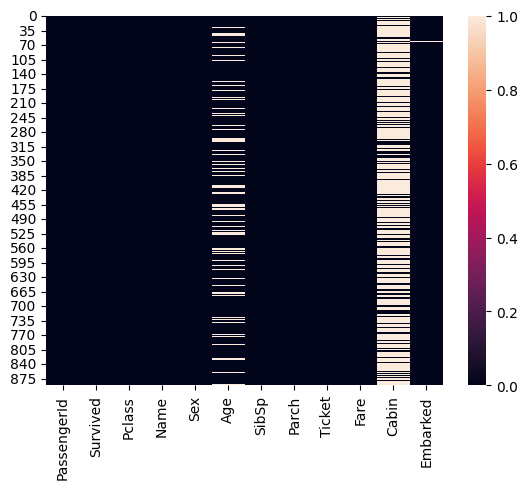

In [283]:
sns.heatmap(data_train.isnull())

# Clean Data

In [284]:
def Clean(data):
  data.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True) # delete colomns
  data.Age = data.Age.fillna(data.Age.median())
  data.dropna()
  return data

In [285]:
Clean(data_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [286]:
Clean(data_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

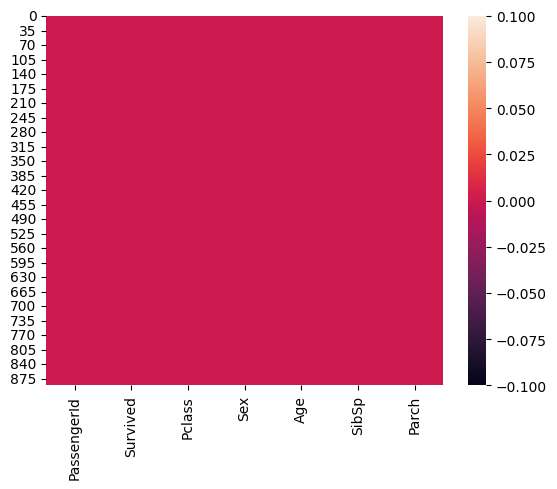

In [287]:
sns.heatmap(data_train.isnull())

<Axes: >

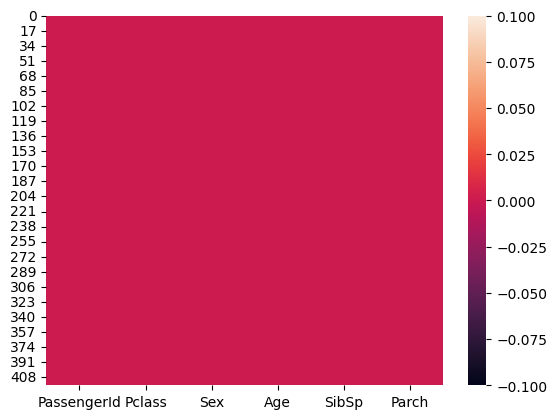

In [288]:
sns.heatmap(data_test.isnull())

# Transform Data


In [289]:
from sklearn.preprocessing import LabelEncoder

In [290]:
le = LabelEncoder()

In [291]:
le.fit(data_train['Sex'])
le.transform(data_train['Sex'])
data_train['Sex'] = le.transform(data_train['Sex'])

In [292]:
data_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [293]:
le.fit(data_test['Sex'])
le.transform(data_test['Sex'])
data_test['Sex'] = le.transform(data_test['Sex'])

In [294]:
data_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1


# Data Analysis

In [295]:
data_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000


<Axes: >

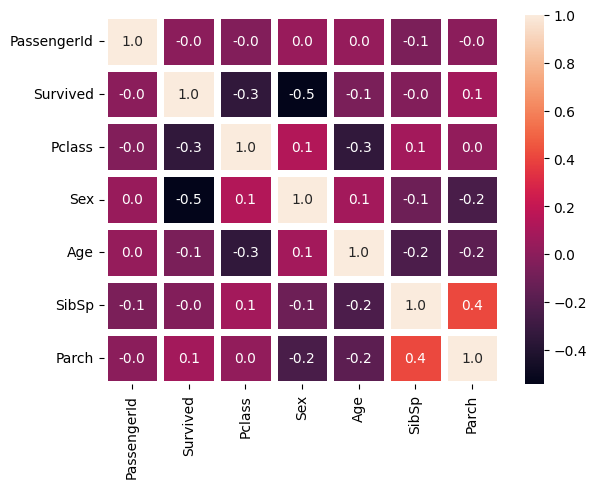

In [296]:
sns.heatmap(data_train.corr(),annot=True,fmt='.1f',linewidths=5)

In [297]:
data_train.Survived.value_counts()

,count
Survived,
0,549
1,342


In [298]:
data_train.Sex.value_counts()

,count
Sex,
1,577
0,314


<Axes: ylabel='count'>

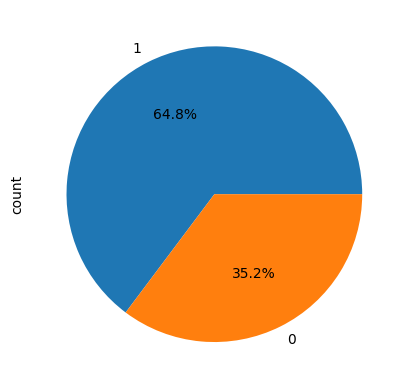

In [299]:
from enum import auto
data_train.Sex.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Sex', ylabel='count'>

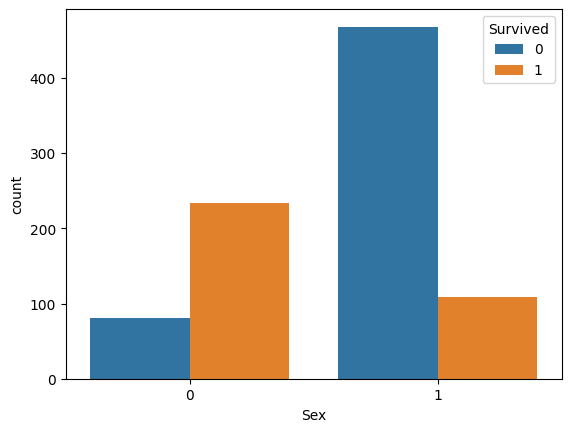

In [300]:
sns.countplot(x='Sex', hue='Survived', data=data_train)

<Axes: xlabel='Pclass', ylabel='count'>

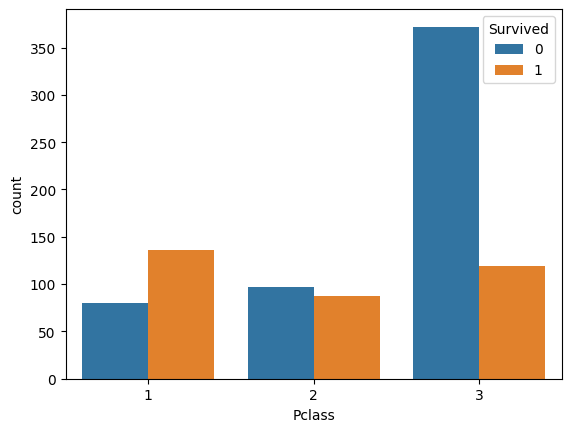

In [301]:
sns.countplot(x='Pclass',hue='Survived',data=data_train)

<Axes: xlabel='Age', ylabel='Count'>

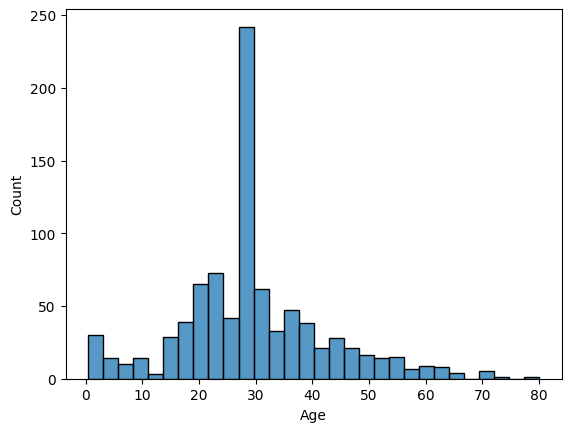

In [302]:
sns.histplot(data_train.Age)

# Create Model

In [303]:
X = data_train.drop('Survived',axis=1)
y = data_train.Survived

In [304]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [305]:
acuuraccies = []

In [306]:
def All(model_name):
  model_name.fit(x_train,y_train)
  prediction = model_name.predict(x_test)
  acuuracy = accuracy_score(prediction , y_test)
  print('Acuraccy  = ',acuuracy)
  acuuraccies.append(acuuracy)






In [308]:
model1 = LogisticRegression()
All(model1)

Acuraccy  =  0.8100558659217877


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [309]:
model2 = RandomForestClassifier()
All(model2)

Acuraccy  =  0.7932960893854749


In [310]:
model3 = GradientBoostingClassifier()
All(model3)

Acuraccy  =  0.8156424581005587


In [311]:
model4 = DecisionTreeClassifier()
All(model4)

Acuraccy  =  0.7206703910614525


In [312]:
model5 = KNeighborsClassifier()
All(model5)

Acuraccy  =  0.5251396648044693


In [313]:
model6 = GaussianNB()
All(model6)

Acuraccy  =  0.770949720670391


In [314]:
model7 = SVC()
All(model7)

Acuraccy  =  0.5865921787709497


In [317]:
acuuraccies

[0.8100558659217877,
 0.7932960893854749,
 0.8156424581005587,
 0.7206703910614525,
 0.5251396648044693,
 0.770949720670391,
 0.5865921787709497]

In [318]:
algorithms = ['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier',
          'KNeighborsClassifier', 'GaussianNB', 'SVC']

In [319]:
new= pd.DataFrame({'Algorithms':algorithms,'Acuuraccies':acuuraccies})

In [320]:
new

,Algorithms,Acuuraccies
0,LogisticRegression,0.810056
1,RandomForestClassifier,0.793296
2,GradientBoostingClassifier,0.815642
3,DecisionTreeClassifier,0.720670
4,KNeighborsClassifier,0.525140
5,GaussianNB,0.770950
6,SVC,0.586592


In [321]:
modelx = GradientBoostingClassifier()
modelx.fit(x_train,y_train)

GradientBoostingClassifier()

In [322]:
Last_Prediction = modelx.predict(data_test)


In [323]:
final = data_test.PassengerId

In [324]:
Results = pd.DataFrame({'PassengerId':final,'Survived':Last_Prediction})

In [325]:
Results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [326]:
Results.to_csv('Submission.csv',index=False)